<a href="https://colab.research.google.com/github/Mainak1792/deep_life/blob/main/face_recognition_using_mtcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 30.1MB/s 


In [2]:
!wget -O madonna.jpg https://i1.sndcdn.com/artworks-000025417758-yajkzf-t500x500.jpg
!wget -O modi.jpg https://images.news18.com/ibnlive/uploads/2019/08/PM-MODI.jpg
!wget -O amitabh.jpg https://www.biography.com/.image/t_share/MTE1ODA0OTcxOTg4MDU5NjYx/raavan---uk-film-premiere-red-carpet-arrivals.jpg
!wget -O denzel.jpg https://timesofindia.indiatimes.com/thumb/msid-56017292,width-1200,height-900,resizemode-4/.jpg
!wget -O serena.jpg https://www.masterclass.com/course-images/images/3126/original/1570652284-SW_cinematic_12x5.jpg?width=450&height=600&fit=cover&dpr=2

--2021-05-20 09:04:39--  https://i1.sndcdn.com/artworks-000025417758-yajkzf-t500x500.jpg
Resolving i1.sndcdn.com (i1.sndcdn.com)... 99.86.230.99, 99.86.230.84, 99.86.230.88, ...
Connecting to i1.sndcdn.com (i1.sndcdn.com)|99.86.230.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘madonna.jpg’

madonna.jpg             [ <=>                ]  75.77K  --.-KB/s    in 0.003s  

2021-05-20 09:04:39 (24.1 MB/s) - ‘madonna.jpg’ saved [77588]

--2021-05-20 09:04:39--  https://images.news18.com/ibnlive/uploads/2019/08/PM-MODI.jpg
Resolving images.news18.com (images.news18.com)... 23.218.218.149, 23.218.218.189, 2600:1408:24::1730:2712, ...
Connecting to images.news18.com (images.news18.com)|23.218.218.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47851 (47K) [image/jpeg]
Saving to: ‘modi.jpg’

modi.jpg            100%[===================>]  46.73K  --.-KB/s    in 0s      

2021-05-20 09:04:39 (271 MB

In [3]:
from mtcnn.mtcnn import MTCNN
import cv2

In [4]:

image = cv2.imread('madonna.jpg')

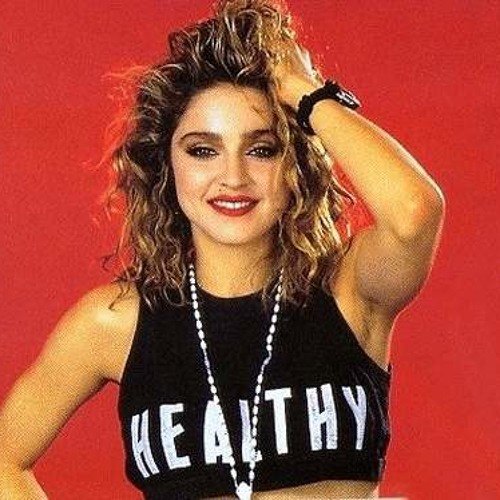

In [5]:

from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [6]:
detector = MTCNN()

faces = detector.detect_faces(image)
for face in faces:
    print(face)

{'box': [171, 93, 116, 148], 'confidence': 0.9974410533905029, 'keypoints': {'left_eye': (203, 151), 'right_eye': (260, 149), 'nose': (234, 181), 'mouth_left': (208, 204), 'mouth_right': (260, 203)}}


In [8]:
def create_bbox(image):
  faces = detector.detect_faces(image)
  bounding_box = faces[0]['box']
  keypoints = faces[0]['keypoints']

  cv2.rectangle(image,
              (bounding_box[0], bounding_box[1]),
              (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
              (0,155,255),
              2)

  cv2.circle(image,(keypoints['left_eye']), 2, (0,155,255), 2)
  cv2.circle(image,(keypoints['right_eye']), 2, (0,155,255), 2)
  cv2.circle(image,(keypoints['nose']), 2, (0,155,255), 2)
  cv2.circle(image,(keypoints['mouth_left']), 2, (0,155,255), 2)
  cv2.circle(image,(keypoints['mouth_right']), 2, (0,155,255), 2)

  return image

In [9]:
marked_image = create_bbox(image)

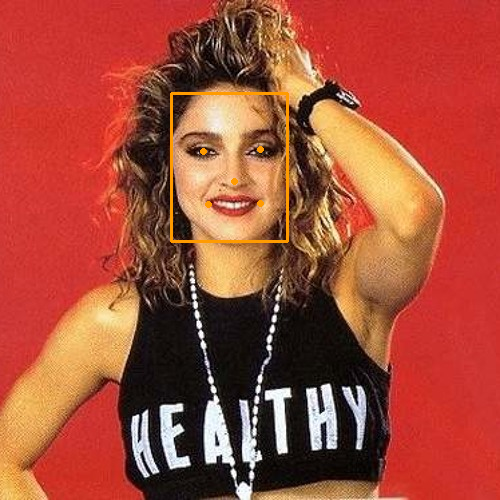

In [10]:
cv2_imshow(marked_image)

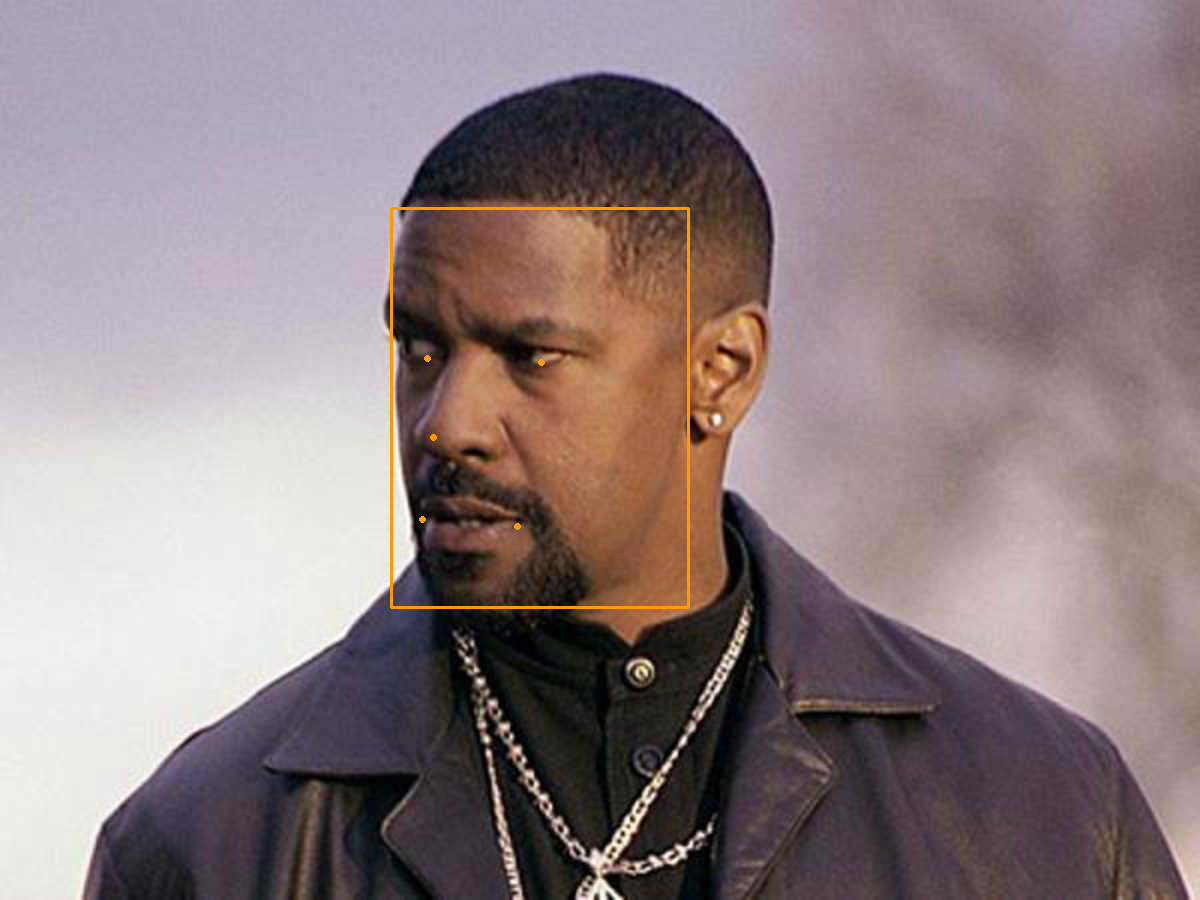

In [11]:
marked_image = create_bbox(cv2.imread('denzel.jpg'))
cv2_imshow(marked_image)


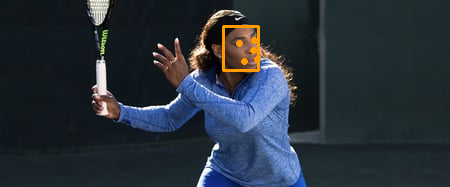

In [12]:
marked_image = create_bbox(cv2.imread('serena.jpg'))
cv2_imshow(marked_image)

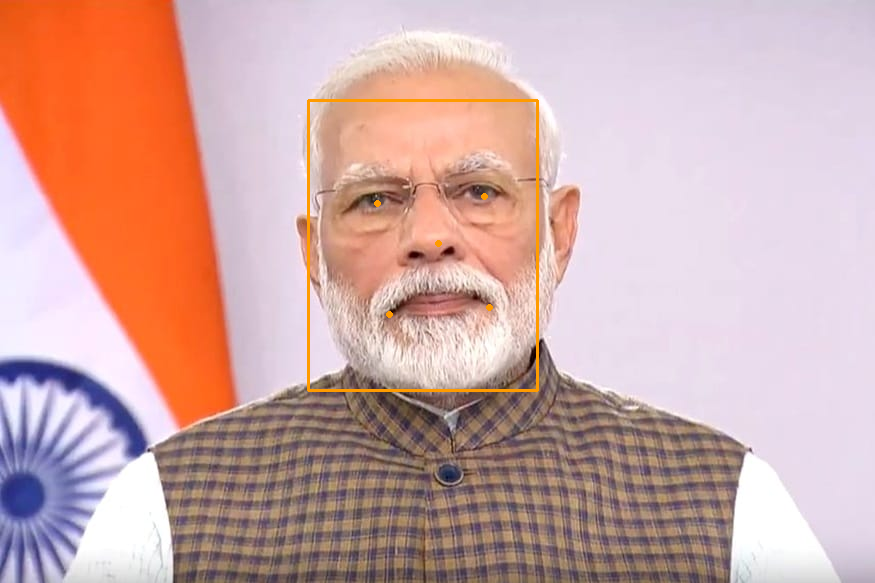

In [13]:

marked_image = create_bbox(cv2.imread('modi.jpg'))
cv2_imshow(marked_image)